In [293]:
import golfy
import numpy as np

num_peptides = 1000
peptides_per_pool = 10
num_hits = 50
max_activity_per_well = 2000
replicates = 3
min_background_peptide_activity = 0
max_background_peptide_activity = 50

min_hit_peptide_activity = 100
max_hit_peptide_activity = 500

background_peptide_activity_range = max_background_peptide_activity - min_background_peptide_activity
hit_peptide_activity_range = max_hit_peptide_activity - min_hit_peptide_activity

s = golfy.init(num_peptides, peptides_per_pool, replicates);
assert golfy.optimize(s, verbose=True, max_iters=500)

all_peptides = np.arange(num_peptides)
np.random.shuffle(all_peptides)
hit_peptides = all_peptides[:num_hits]
not_hit_peptides = all_peptides[num_hits:]
print("Hits: %s" % (hit_peptides,))

background = np.random.rand(num_peptides) * background_peptide_activity_range + min_background_peptide_activity
print("Background activity: %s" % (background,))

hit_activity = np.random.rand(num_peptides) * hit_peptide_activity_range + min_hit_peptide_activity
hit_activity[not_hit_peptides] = 0
print("Hit activity: %s" % (hit_activity,))

spot_counts =  {
    r: {
        pool: min(max_activity_per_well, int(sum([background[i] + hit_activity[i] for i in peptides])))
        for (pool, peptides) in d.items()
    } 
    for (r, d) in s.assignments.items()
}
print("Spot counts: %s" % (spot_counts,))


Initial solution has 4 violations
1) 4 -> 2
2) 2 -> 0
Found valid solution after 2 swaps
Hits: [629 589 796 967 745 407  38 309 771 833 957 754 609 546 305 712 737 995
 935 630 735 281 938 360  71  36  76 481 537  69 660 244 426 524 479 514
 108  18   8 404 356 761  57 270 694 769 174  11  22 765]
Background activity: [4.31197442e+01 3.71808065e+01 3.64298413e+01 4.17095638e+01
 1.52758597e+01 4.67522323e+01 3.01855982e+01 3.47713457e+01
 2.66576680e+01 1.26534471e+01 3.31794358e+01 7.82566193e+00
 7.99752765e+00 1.18196588e+01 2.95224784e+00 2.63119893e+01
 4.16972301e+01 1.08739176e+01 2.79179402e+01 3.58537206e+01
 1.56223926e+01 1.37228077e+01 2.53899833e+01 9.65300164e+00
 6.93158066e+00 3.62887768e+01 4.01331719e+01 2.99466393e+01
 1.90346300e+01 4.59204741e+01 9.48309726e+00 2.01716595e+01
 7.94102857e+00 1.62917912e+01 1.37867829e+01 1.18699131e+01
 3.35657641e+01 4.95819929e+01 4.61735455e+01 1.18863728e+01
 2.30582229e+01 3.51861224e+01 1.87228098e+01 4.11773388e+01
 1.222719

In [294]:
A = np.zeros((s.num_pools(), num_peptides + 1)).astype(float)
b = np.zeros(s.num_pools()).astype(float)
pool_tuple_to_idx = {}
idx_to_pool_tuple = {}
i = 0
for (r, d) in spot_counts.items():
    for pool, spots in d.items():
        b[i] = spots
        pool_tuple_to_idx[(r, pool)] = i
        idx_to_pool_tuple[i] = (r, pool)
        for p in s.assignments[r][pool]:
            A[i, p] = 1
        # add a ones column for a constant offset
        A[i, num_peptides] = 1
        i += 1
print("Ax = b")
print("=======")
print("A.shape: %s" % (A.shape,))
print("b.shape: %s" % (b.shape,))
print("A:\n%s" % (A,))
print("A col sums: %s" % (A.sum(axis=0)))
print("A row sums: %s" % (A.sum(axis=1)))
print("b:\n%s" % (b,))



Ax = b
A.shape: (300, 1001)
b.shape: (300,)
A:
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]
A col sums: [  3.   3.   3. ...   3.   3. 300.]
A row sums: [11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11. 11.
 11. 11

In [295]:
x, residuals, rank, singular_values = np.linalg.lstsq(A, b, rcond=None)

In [296]:
x

array([-18.30572496, -21.28217005,  47.44779791, ..., -51.29821274,
        38.21356349, 347.25454545])

In [297]:
hit_peptides

array([629, 589, 796, 967, 745, 407,  38, 309, 771, 833, 957, 754, 609,
       546, 305, 712, 737, 995, 935, 630, 735, 281, 938, 360,  71,  36,
        76, 481, 537,  69, 660, 244, 426, 524, 479, 514, 108,  18,   8,
       404, 356, 761,  57, 270, 694, 769, 174,  11,  22, 765])

In [298]:
b

array([ 287.,  233.,  280.,  208.,  226.,  324.,  268.,  678.,  443.,
        261.,  215.,  225.,  251.,  216.,  269.,  539.,  232.,  235.,
        243.,  169.,  513.,  192.,  215., 1052.,  555.,  259.,  238.,
        407.,  434.,  170.,  239.,  189.,  252.,  148.,  272.,  408.,
        236.,  774.,  228.,  906.,  310.,  454.,  188.,  149.,  186.,
        329.,  213.,  700.,  244.,  421.,  514.,  235.,  387.,  276.,
        261.,  264.,  747.,  589.,  714.,  250.,  530.,  163.,  159.,
        596.,  511.,  208., 1011.,  241.,  590.,  275.,  312.,  252.,
        165.,  616.,  419.,  295.,  267.,  290.,  215.,  475.,  204.,
        649., 1005.,  276.,  214.,  383.,  285.,  242.,  954.,  207.,
        495.,  270.,  631.,  254.,  471.,  268., 1015., 1021.,  523.,
        320.,  298.,  302.,  169.,  292.,  424.,  247.,  443.,  226.,
        551.,  147.,  349.,  262.,  356.,  559.,  697.,  229.,  260.,
        473.,  759.,  397.,  273.,  229.,  412.,  618.,  271.,  618.,
        193.,  946.,

In [299]:
x[not_hit_peptides]

array([ 1.42198976e+01, -3.17243038e+01,  8.62700282e+01,  2.08323771e+01,
       -1.14066811e+01, -1.40265957e+01, -1.80285007e+01,  2.04237152e+01,
       -1.70483465e-01,  6.04528289e+01,  2.48516361e+01,  5.16448671e+00,
        3.64856072e+01, -7.11100601e+01, -2.14451552e+01, -9.02713830e+00,
       -2.58133950e+01,  9.28026065e+00,  3.24468798e+00, -3.43988409e+01,
        4.97283286e+01, -1.71320670e+01, -2.90385349e+01, -2.19951219e+01,
       -2.29081219e+01,  7.78720450e-01, -5.43330184e+01, -9.82661439e+00,
       -6.47330775e+00, -3.22475255e-01,  4.63041498e+01,  5.79186627e+00,
        7.28158567e-01, -8.90766585e+00, -2.81375868e+01,  1.03976530e+01,
       -8.23714527e-01,  8.04855487e+00,  2.90427837e+00,  3.92662089e+01,
        4.96350451e+00, -1.60850688e+01, -2.36266102e+00, -4.15240682e+01,
        6.14552234e+01,  1.21642643e+01, -5.24474707e+01, -1.31903641e+01,
       -1.20813036e+01, -1.25641868e+01, -2.51195934e+01,  9.42752467e+00,
        5.10534999e+01,  

<Axes: xlabel='lasso_frac', ylabel='true_activity'>

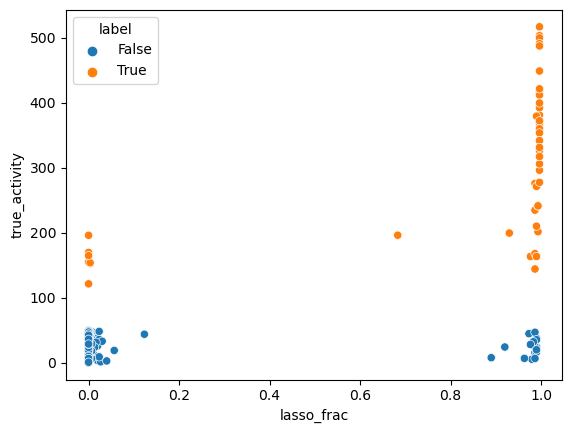

In [313]:
import pandas as pd
import random
import sklearn.linear_model
A_inv = np.linalg.pinv(A)
x_est_inv = A_inv @ b

lasso = sklearn.linear_model.Lasso(fit_intercept=False, selection='random')
row_indices = list(range(A.shape[0]))
x_lasso = np.zeros(num_peptides)
frac = np.zeros(num_peptides)
for loo_idx in row_indices[:-1]:
    subset_indices = np.array([i for i in row_indices if i != loo_idx])
    A_subset = A[subset_indices, :]
    b_subset = b[subset_indices]
    lasso.fit(A_subset, b_subset)
    x_lasso += lasso.coef_[:-1]
    frac += lasso.coef_[:-1] > 1
x_lasso /= len(row_indices)
frac /= len(row_indices)
df = pd.DataFrame({
    "background": background,
    "hit": hit_activity,
    "true_activity": hit_activity + background,
    "est_activity_lstsq": x[:-1],
    "est_activity_pinv": x_est_inv[:-1],
    "est_activity_lasso": x_lasso,
    "lasso_frac": frac,
    "label": hit_activity> 0})
seaborn.scatterplot(data=df, x="lasso_frac", y="true_activity", hue="label")

In [317]:
(df[df.label].lasso_frac > 0.5).mean()

0.86

In [318]:
(df[~df.label].lasso_frac > 0.5).mean()

0.018947368421052633

<Axes: >

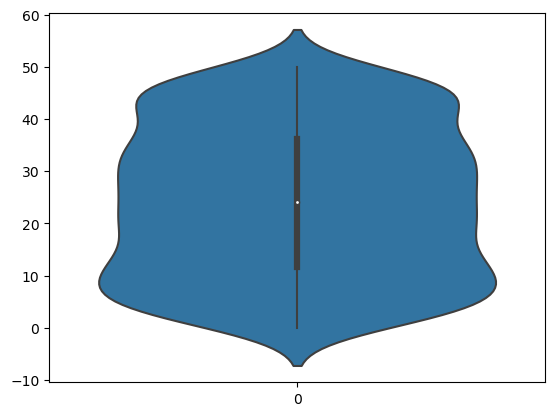

In [302]:
seaborn.violinplot(data=df.background)

<Axes: >

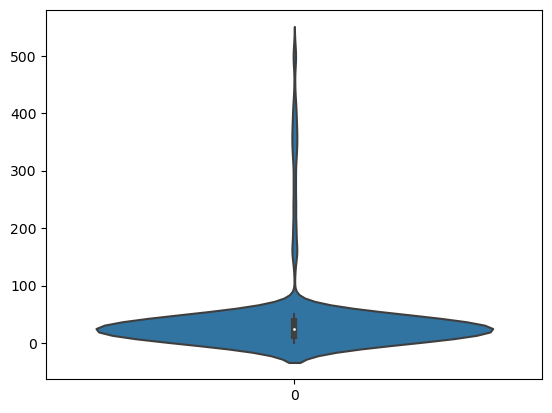

In [303]:
seaborn.violinplot(data=df.true_activity)

In [304]:
sorted(hit_peptides)

[8,
 11,
 18,
 22,
 36,
 38,
 57,
 69,
 71,
 76,
 108,
 174,
 244,
 270,
 281,
 305,
 309,
 356,
 360,
 404,
 407,
 426,
 479,
 481,
 514,
 524,
 537,
 546,
 589,
 609,
 629,
 630,
 660,
 694,
 712,
 735,
 737,
 745,
 754,
 761,
 765,
 769,
 771,
 796,
 833,
 935,
 938,
 957,
 967,
 995]

In [305]:
hit_activity[21]

0.0

In [306]:
lasso.coef_

array([ -0.        ,  -0.        ,   0.        , ...,  -0.        ,
         0.        , 300.54950196])

In [307]:
lasso.coef_[:-1]

array([-0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        2.37403226e+02, -0.00000000e+00,  0.00000000e+00,  1.94093363e+02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.12868814e+02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  3.05723271e+02,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -5.46337679e+00,
        1.46003238e+02,  0.00000000e+00,  3.17348214e+02, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -